In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Задача 1

### Коробки с шоколадом упаковываются автоматически. Их средняя масса равна 1.06 кг. Известно, что 5% коробок имеют массу, меньшую 1 кг. Найдите: а) среднее квадратическое отклонение массы коробки, б) процент коробок, имеющих массу больше 1.1 кг.

#### Подсказка. 1. Можно считать, что распределение массы коробки нормальное. 2. Найдите такое значение scale, для которого значение cdf(x=1, loc=1.06, scale=scale) близко к 0.05. Точности 0.0001 будет достаточно.

𝑃(𝑋<1) = 0.05 = F(1)

In [2]:
mu = 1.06
p = 0.05
er = 0.0001
start = 0
end = 1

In [4]:
while True:
    scale = (start + end)/2
    cdf = stats.norm.cdf(1, loc = mu, scale = scale)
    if cdf <= p - er:
        start = scale
    elif cdf >= p + er:
        end = scale
    else:
        print('scale = ', round(scale, 4))
        break

scale =  0.0365


Таким образом, а) среднее квадратическое отклонение массы коробки scale = 0.0365

Далее ищем процент коробок с массой более 1.1

P(x>1.1) = 1 - P(x<1.1)

In [6]:
b = 1 - stats.norm.cdf(1.1, loc = mu, scale = scale)
print(round(b, 4))

0.1364


Таким образом, коробки с массой болшье 1.1 составляют 13.6% 

## Задача 2

### Коробка содержит 30 конфет. Известно, что масса каждой конфеты распределена равномерно в промежутке от 12 до 14 граммов. Используя центральную предельную теорему, найти вероятность, что масса всей коробки будет: а) меньше 390 граммов, б) больше 395 граммов, в) от 380 до 400 граммов.

### Массой самой коробки можно пренебречь.

#### Подсказка. Для равномерного распределения в промежутке [a, b]:
#### 1. мат. ожидание равно (a + b) / 2,
#### 2. дисперсия равна (b - a)^2 / 12.

In [9]:
a = 12
b = 14
n = 30

M = (a + b) / 2
D = (b - a)**2 / 12

mu = n * M
sigma = np.sqrt(n * D)

In [13]:
# вероятность, что масса всей коробки будет: а) меньше 390 граммов 
# P(x<390) = F(390)

stats.norm.cdf(390, loc = mu, scale = sigma)

0.5

In [14]:
# вероятность, что масса всей коробки будет: б) больше 395 граммов
# P(x>390) = 1 - F(390)

1 - stats.norm.cdf(390, loc = mu, scale = sigma)

0.5

In [15]:
# вероятность, что масса всей коробки будет: в) от 380 до 400 граммов.
# p(380<x<400) = F(400) - F(380)

stats.norm.cdf(400, loc = mu, scale = sigma) - stats.norm.cdf(380, loc = mu, scale = sigma)

0.9984345977419975

## Задача 3

### Продемонстрируйте действие центральной предельной теоремы на каком-нибудь распределении на ваш выбор (кроме нормального). Что для этого нужно сделать:

### 1. Выберите несколько значений n (например, 2, 5, 10, 50).

### 2. Для выбранного значения n сгенерируйте 1000 раз выборку размера n из выбранного вами распределения, посчитайте по этой выборке выборочное среднее.

### 3. Изобразите гистограмму из полученных 1000 значений выборочного среднего с аргументом density=True.

### 4. Поверх гистограммы нарисуйте функцию плотности нормального распределения с параметрами из ЦПТ (т.е. mu = M, sigma^2 = D / n, где M - мат. ожидание выбранного вами распределения, D - его дисперсия).
#### При достаточно большом n гистограмма должна соответствовать построенной функции плотности.

In [19]:
n_ = 10
p = 0.5

m = n_ * p
d = n_ * p * (1 - p)

n_samples = 1000

In [20]:
def get_mean_samples_binomial(n):
    samples = np.random.binomial(n_, p, size=(n, n_samples))
    
    return samples.mean(axis=0)

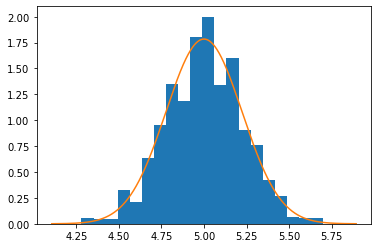

In [26]:
n = 50

loc = m
scale = np.sqrt(d / n)

samples = get_mean_samples_binomial(n)

ox = np.linspace(loc - 4 * scale, loc + 4 * scale, 1000)
oy = np.array([pdf_normal(loc, scale, x) for x in ox])

plt.hist(samples, density=True, bins=20)
plt.plot(ox, oy)